<b><h1 style="color: #6a5acd">Customer Segmentation & Analysis<h1></b>


<h3><b>What is customer segmentation and analysis</h3></b>
<p>Customer segmentation is the process of dividing a company's customers into groups based on common characteristics which allows busssiness to understand their customers composition better and provides a way to tailor their marketing strategies for each group effectively and appropriately.
</p>

<h2><b>Different Process Involved</b></h3>
<ul>
<li>Problem Statement</li>
<li>Define Objective and Scope</li>
<li> Data Collection</li>
<li>Data Preprocessing</li>
<li>Data Visualization</li>
<li>Model Realisation</li>
<li>Model Evaluation</li>
</ul>

<h3><b>Problem Statement</h3></b>
<p>In this case study, your task is to identify major customer segments on a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

<h3><b>Objective & Scope</h3></b>
<p>To leverage data science techniques to develop a robust customer segmentation model that enables the business to effectively identify distinct customer groups, understand their unique needs, and tailor strategies to maximize business impact.Thus providing bussines a more effective and reliabale way to understand the customer base, rather than relying on techniques such as RFM(Recency,Frequency,Monetary).</p>


<h3><b>Data Description:</u></h3></b>
Attribute Information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt



<h1>Data preparation <h1>

<h3>Data Understanding</h3>

In [2]:
# loading the data
cust_df=pd.read_csv('Online Retail.csv')

In [3]:
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
cust_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [5]:
cust_df.shape

(541909, 8)

In [6]:
cust_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

<h3>Handling Missing values and Duplicate values

In [8]:
cust_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [32]:
cust_df.dropna(inplace=True)

In [36]:
cust_df.duplicated().sum()

5225

In [37]:
cust_df.drop_duplicates(inplace=True)

In [38]:
cust_df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


<p>It is clearly visible that UnitPrice contains value of 0 which is not possible for a commercial store

In [48]:
cust_df=cust_df[cust_df['UnitPrice']>0]

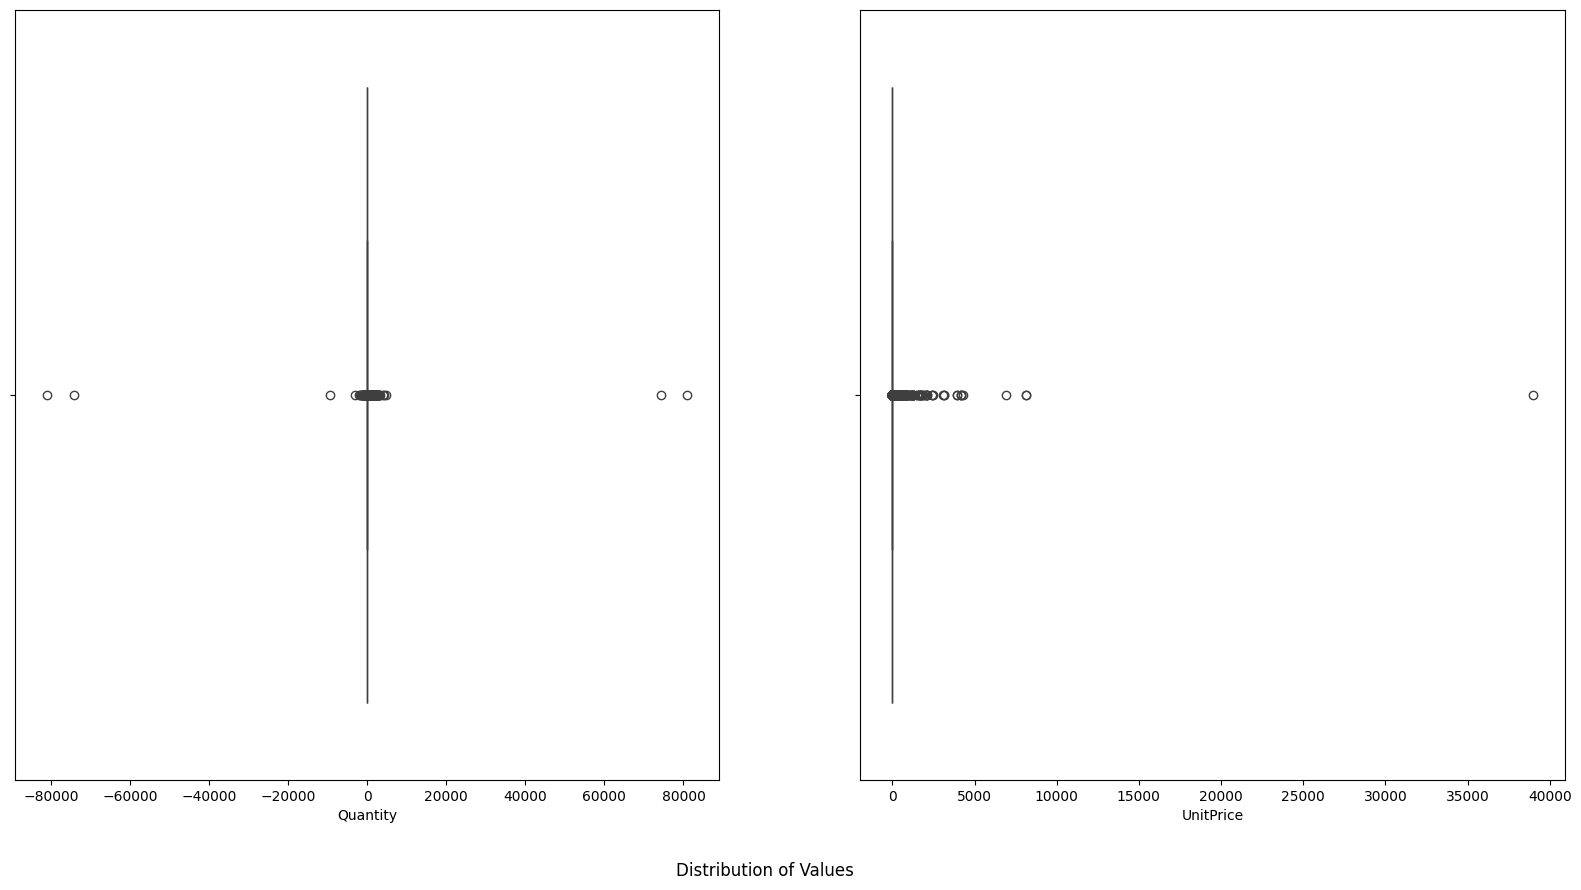

In [49]:
fig,axes=plt.subplots(1,2)
sns.boxplot(cust_df['Quantity'],ax=axes[0],orient='h')
sns.boxplot(cust_df['UnitPrice'],ax=axes[1],orient='h')
fig.set_figwidth(20)
fig.set_figheight(10)
fig.supxlabel('Distribution of Values')
plt.show()

<p>It is clearly visible that the distribution of data for UnitPrice and Quantity features are not normal.

<p>Negative values in Quantity are due to cancelled orders so filtering the cancelled orders is good approach here

In [64]:
cust_df=cust_df[~cust_df['InvoiceNo'].str.startswith('C')]

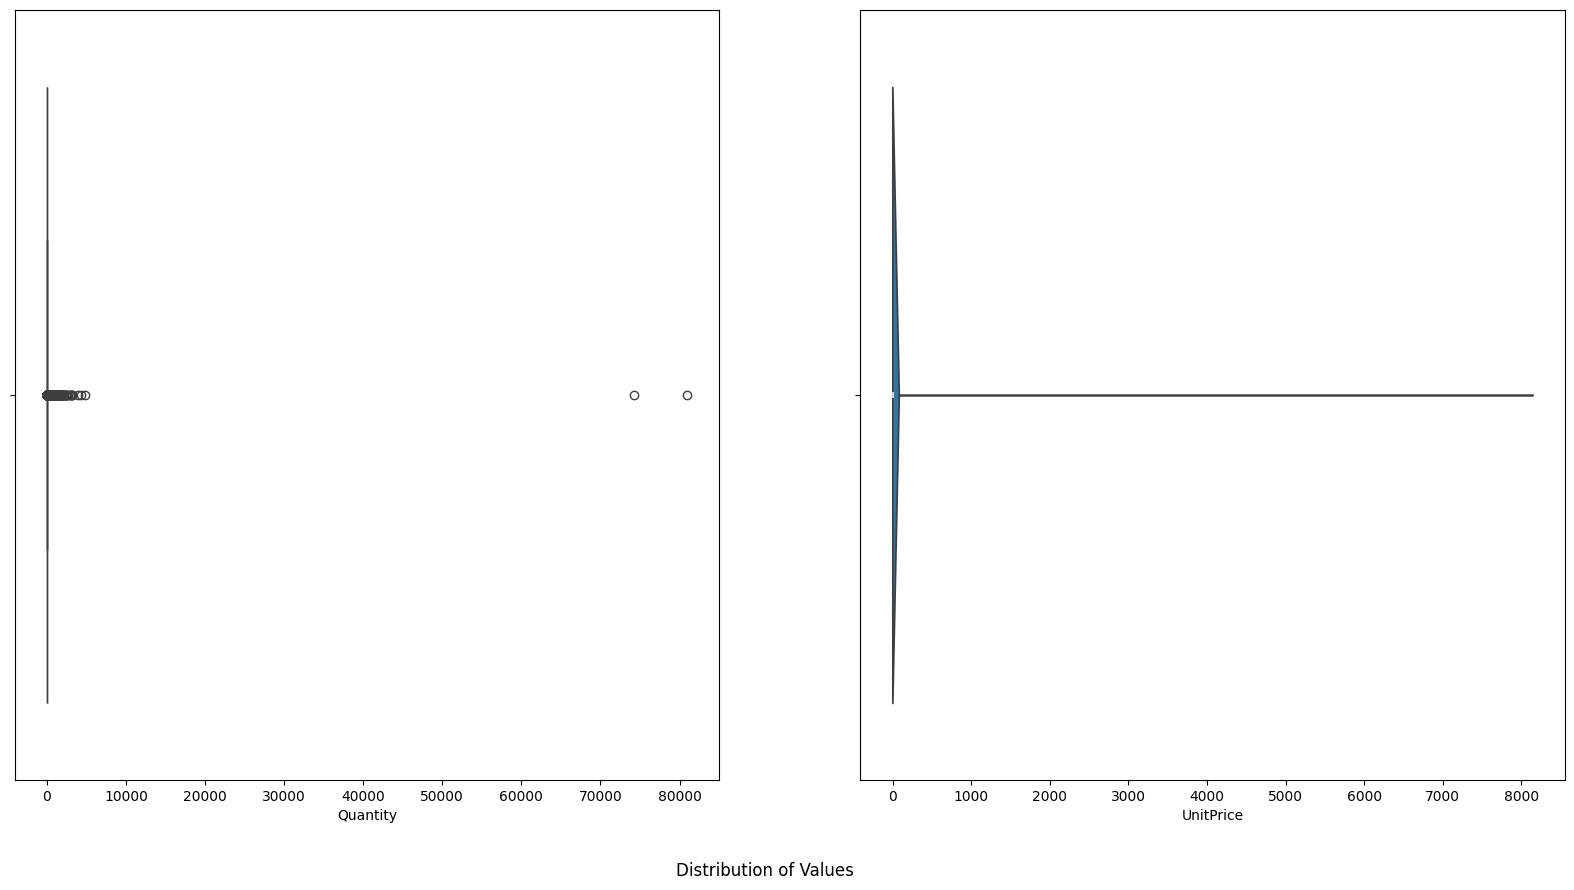

In [69]:
fig,axes=plt.subplots(1,2)
sns.boxplot(cust_df['Quantity'],ax=axes[0],orient='h')
sns.violinplot(cust_df['UnitPrice'],ax=axes[1],orient='h')
fig.set_figwidth(20)
fig.set_figheight(10)

fig.supxlabel('Distribution of Values')
plt.show()
del(fig,axes)

<h2>Feature Engineering

In [79]:
date_df=pd.to_datetime(cust_df['InvoiceDate'],format="%m/%d/%y %H:%M")

<p>Creating new Derived features from Invoiced data for Analysis</p>

In [84]:
cust_df['Day_num']=date_df.dt.day
cust_df['Month_num']=date_df.dt.month
cust_df['Year']=date_df.dt.year
cust_df['Month']=date_df.dt.month_name()
cust_df['Day']=date_df.dt.day_name()

C:\Users\nirma\AppData\Local\Temp\ipykernel_15800\2745127028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df['Day_num']=date_df.dt.day
C:\Users\nirma\AppData\Local\Temp\ipykernel_15800\2745127028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df['Month_num']=date_df.dt.month
C:\Users\nirma\AppData\Local\Temp\ipykernel_15800\2745127028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [87]:
#Removing Invoice Date column as its not required anymore
cust_df.drop('InvoiceDate',axis=1,inplace=True)
cust_df

C:\Users\nirma\AppData\Local\Temp\ipykernel_15800\1441019100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df.drop('InvoiceDate',axis=1,inplace=True)


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day_num,Month_num,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,1,12,2010,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,1,12,2010,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,1,12,2010,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,1,12,2010,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,1,12,2010,December,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,9,12,2011,December,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,9,12,2011,December,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,9,12,2011,December,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,9,12,2011,December,Friday
